In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')

In [4]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [5]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [6]:
df.dtypes

Country                                  object
Age                                       int64
Gender                                   object
Education Level                           int64
BMI                                     float64
Physical Activity Level                  object
Smoking Status                           object
Alcohol Consumption                      object
Diabetes                                 object
Hypertension                             object
Cholesterol Level                        object
Family History of Alzheimer’s            object
Cognitive Test Score                      int64
Depression Level                         object
Sleep Quality                            object
Dietary Habits                           object
Air Pollution Exposure                   object
Employment Status                        object
Marital Status                           object
Genetic Risk Factor (APOE-ε4 allele)     object
Social Engagement Level                 

In [8]:
categorical_data = df.select_dtypes(include=['object']).columns
numberical_data = df.select_dtypes(include=['int64', 'float']).columns

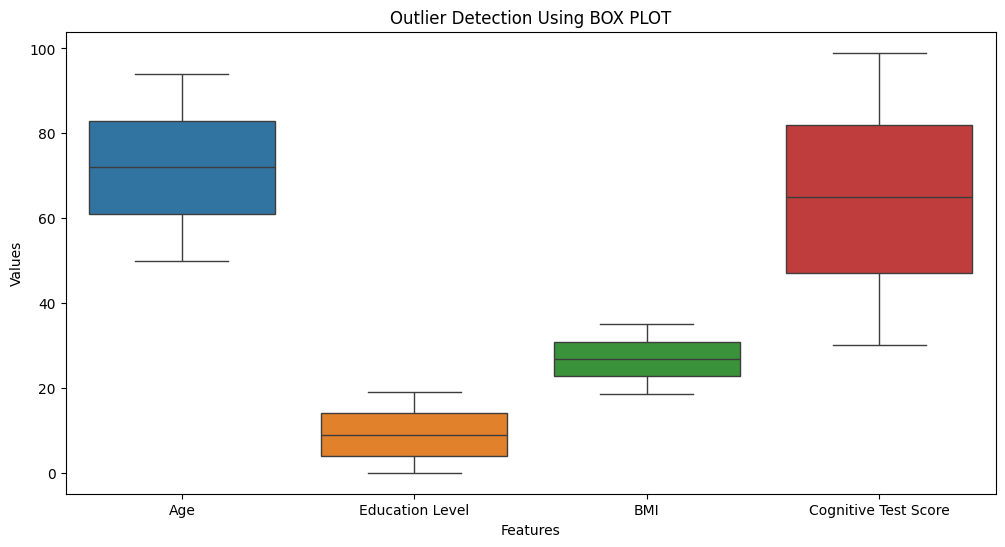

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data = df[numberical_data])

plt.title('Outlier Detection Using BOX PLOT')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [10]:
df = pd.get_dummies(df, columns=categorical_data, drop_first=True)

In [14]:
skewness = df.skew()
skewness

Age                                         0.004061
Education Level                             0.001786
BMI                                        -0.005046
Cognitive Test Score                       -0.006409
Country_Australia                           4.082849
Country_Brazil                              4.050275
Country_Canada                              4.131616
Country_China                               4.210897
Country_France                              4.132267
Country_Germany                             4.070246
Country_India                               4.112198
Country_Italy                               4.123174
Country_Japan                               4.105774
Country_Mexico                              4.206810
Country_Norway                              4.134874
Country_Russia                              4.088551
Country_Saudi Arabia                        4.163817
Country_South Africa                        4.100014
Country_South Korea                         4.

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Alzheimer’s Diagnosis_Yes', axis=1)
y = df['Alzheimer’s Diagnosis_Yes']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

In [25]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7148818738641718

In [33]:
confusion_matrix(y_test, y_pred)

array([[6931, 1788],
       [2448, 3690]])

In [34]:
precision_score(y_test, y_pred)

0.6736035049288062

In [35]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.74      0.79      0.77      8719\n        True       0.67      0.60      0.64      6138\n\n    accuracy                           0.71     14857\n   macro avg       0.71      0.70      0.70     14857\nweighted avg       0.71      0.71      0.71     14857\n'